<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/seunghyeon/%EC%9C%BC%EB%9C%B8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 으뜸 머신러닝 LAB 10

## LAB 10-1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 100, 10
# 비어있는 넘파이 배열을 생성한다.
seq_X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))


# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)



shift = np.random.randn(size) # 시퀀스 추출에 사용할 구간을 옮겨 놓는 값
for i in range(size):
    seq_X[i,:,:] = np.sin(shift[i] + interval[:-1]).reshape(seq_len, 1)
    Y[i] = np.sin(shift[i] + interval[-1])

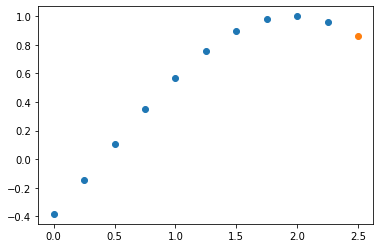

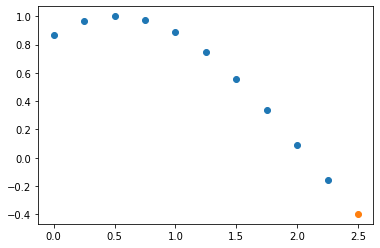

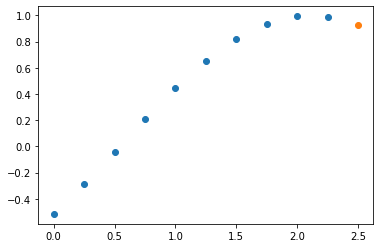

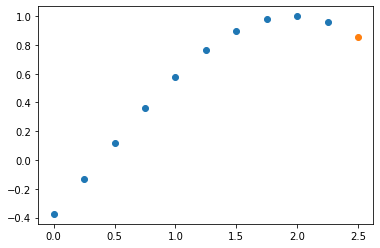

In [2]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :,:])
    plt.scatter(interval[-1], Y[i])
    plt.show()

In [3]:
train_X = seq_X[:80]
train_y = Y[:80]
test_X = seq_X[80:]
test_y = Y[80:]

In [4]:
import tensorflow as tf
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False,
                              input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 1s 5ms/step - loss: 0.1666
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0997
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0568
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0319
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0195
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0134
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0097
Epoch 8/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 11/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 12/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 13/50
3/3 [==============================] - 0s 5ms/step - loss: 0.

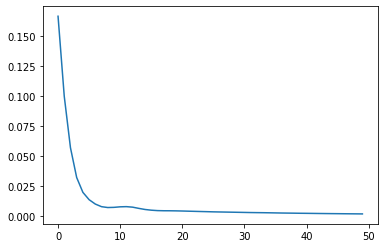

In [5]:
history = simpleRNN_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])

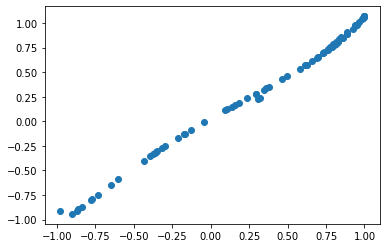

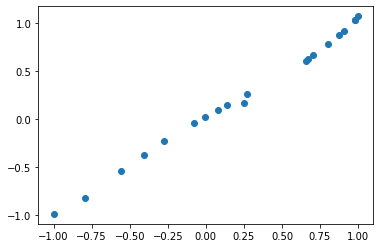

In [6]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

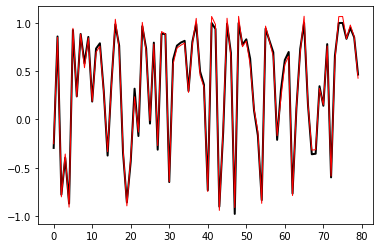

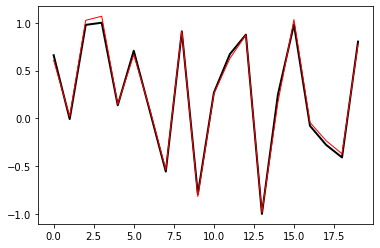

In [7]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)
plt.show()

In [8]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False,
                         input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 2s 10ms/step - loss: 0.4184
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 0.4037
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3895
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3767
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3645
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3538
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 0.3426
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: 0.3332
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3238
Epoch 10/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3152
Epoch 11/50
3/3 [==============================] - 0s 6ms/step - loss: 0.3064
Epoch 12/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2985
Epoch 13/50
3/3 [==============================] - 0s 9ms/step - loss: 0

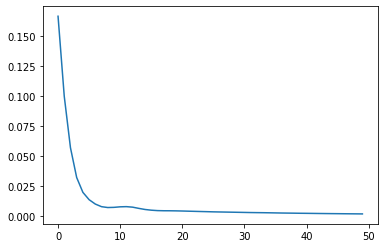

In [9]:
istory = LSTM_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])

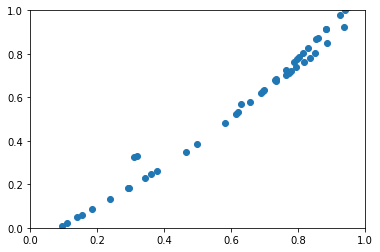

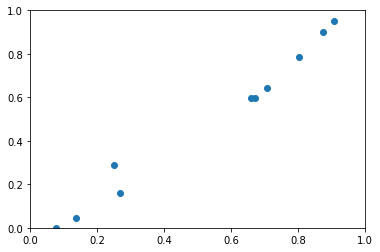

In [10]:

train_y_hat = LSTM_model.predict(train_X)
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(train_y, train_y_hat)
plt.show()
plt.xlim([0,1])
plt.ylim([0,1])
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

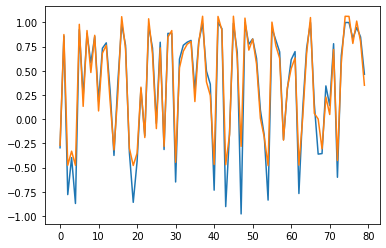

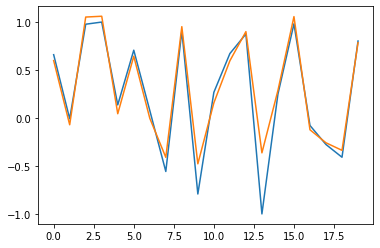

In [11]:
plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()
plt.plot(test_y)
plt.plot(test_y_hat)

In [12]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, 
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

Epoch 1/50
3/3 [==============================] - 2s 7ms/step - loss: 0.5461
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 0.5226
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 0.4996
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 0.4790
Epoch 5/50
3/3 [==============================] - 0s 9ms/step - loss: 0.4588
Epoch 6/50
3/3 [==============================] - 0s 6ms/step - loss: 0.4387
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 0.4208
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: 0.4043
Epoch 9/50
3/3 [==============================] - 0s 6ms/step - loss: 0.3870
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3731
Epoch 11/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3590
Epoch 12/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3459
Epoch 13/50
3/3 [==============================] - 0s 7ms/step - loss: 0.

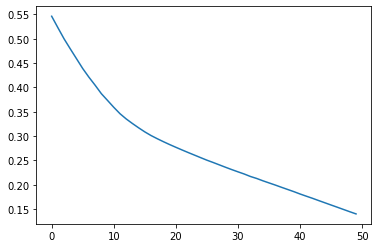

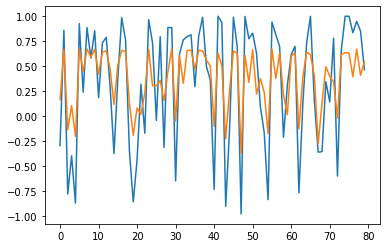

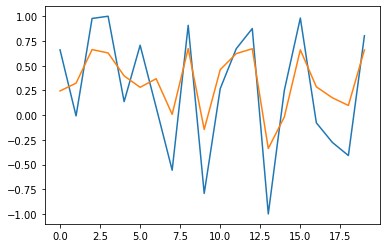

In [13]:
GRU_model.compile(optimizer ='adam', loss = 'mse')
history = GRU_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])
plt.show()

train_y_hat = GRU_model.predict(train_X)
test_y_hat = GRU_model.predict(test_X)
plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()
plt.plot(test_y)
plt.plot(test_y_hat)
plt.show()

## Lab 10-2

In [15]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 200, 30
# 비어있는 넘파이 배열을 생성한다.
# 이번에 생성할 데이터는 시퀀스에 인덱스가 있다
seq_X = np.empty(shape=(size, seq_len, 2))
Y = np.empty(shape=(size,))

# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

shift = np.random.randn(size)
for i in range(size):  # 시퀀스 내의 각 원소에 대해 인덱스와 값을 설정
    seq_X[i,:,0] = np.random.randint(0, 6, size=(seq_len)) # 인덱스 
    seq_X[i,:,1] = np.sin(shift[i] + interval[:-1])        # 값 
    # label은 시퀀스 내에서 짝수 인덱스를 가진 원소의 값을 모두 더한 값
    even_idx = seq_X[i, seq_X[i,:,0]%2 == 0 ]
    Y[i] = even_idx[:,1].sum()

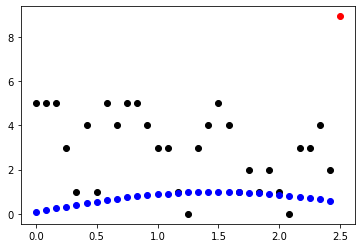

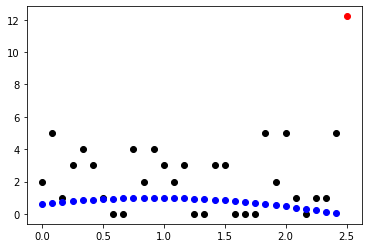

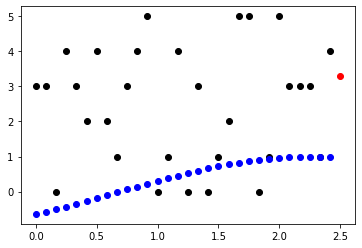

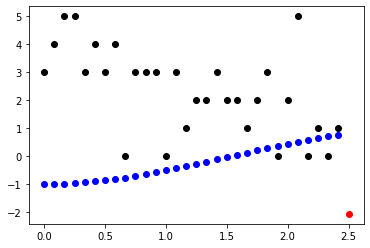

In [16]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :, 0], color='k') # 인덱스 정보
    plt.scatter(interval[:-1], seq_X[i, :, 1], color='b') # 값: 사인 시퀀스
    plt.scatter(interval[-1], Y[i], color='r')
    plt.show()

In [17]:
train_X = seq_X[:180]
train_y = Y[:180]
test_X = seq_X[180:]
test_y = Y[180:]

In [18]:

import tensorflow as tf
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False,
                              input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                130       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 1s 6ms/step - loss: 61.3905
Epoch 2/150
6/6 [==============================] - 0s 6ms/step - loss: 59.9671
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 58.5229
Epoch 4/150
6/6 [==============================] - 0s 5ms/step - loss: 57.1370
Epoch 5/150
6/6 [==============================] - 0s 6ms/step - loss: 55.8624
Epoch 6/150
6/6 [==============================] - 0s 6ms/step - loss: 54.5215
Epoch 7/150
6/6 [==============================] - 0s 8ms/step - loss: 53.2475
Epoch 8/150
6/6 [==============================] - 0s 5ms/step - loss: 52.0309
Epoch 9/150
6/6 [==============================] - 0s 6ms/step - loss: 50.9218
Epoch 10/150
6/6 [==============================] - 0s 6ms/step - loss: 49.8248
Epoch 11/150
6/6 [==============================] - 0s 6ms/step - loss: 48.7096
Epoch 12/150
6/6 [==============================] - 0s 5ms/step - loss: 47.7220
Epoch 13/150
6/6 [==============================]

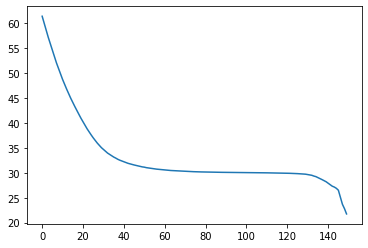

In [19]:
history = simpleRNN_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

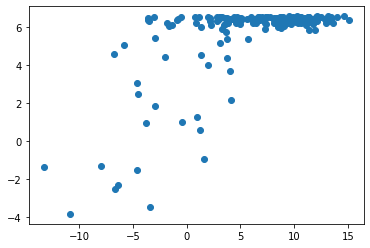

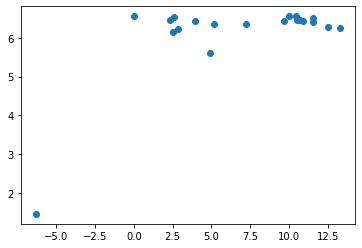

In [20]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

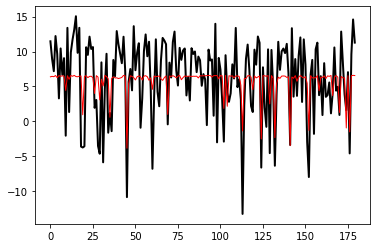

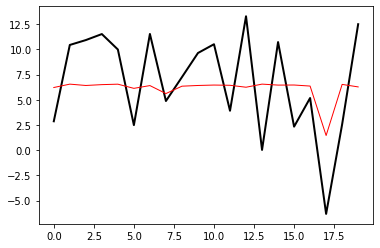

In [21]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [22]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False,
                         input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 2s 11ms/step - loss: 78.6578
Epoch 2/150
6/6 [==============================] - 0s 12ms/step - loss: 76.6840
Epoch 3/150
6/6 [==============================] - 0s 13ms/step - loss: 74.8456
Epoch 4/150
6/6 [==============================] - 0s 11ms/step - loss: 73.2088
Epoch 5/150
6/6 [==============================] - 0s 12ms/step - loss: 71.6896
Epoch 6/150
6/6 [==============================] - 0s 11ms/step - loss: 70.3353
Epoch 7/150
6/6 [==============================] - 0s 12ms/step - loss: 68.9548
Epoch 8/150
6/6 [==============================] - 0s 11ms/step - loss: 67.7061
Epoch 9/150
6/6 [==============================] - 0s 13ms/step - loss: 66.4626
Epoch 10/150
6/6 [==============================] - 0s 14ms/step - loss: 65.2816
Epoch 11/150
6/6 [==============================] - 0s 11ms/step - loss: 64.0767
Epoch 12/150
6/6 [==============================] - 0s 11ms/step - loss: 62.8490
Epoch 13/150
6/6 [===================

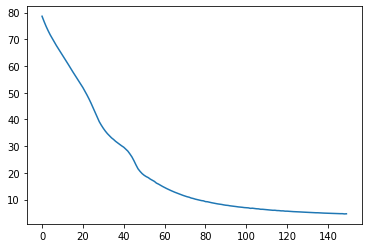

In [23]:
history = LSTM_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

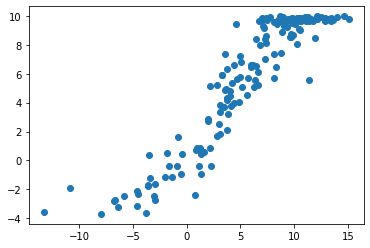

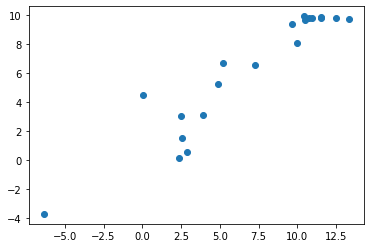

In [24]:
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

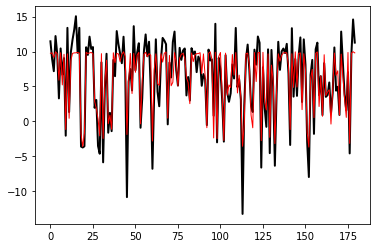

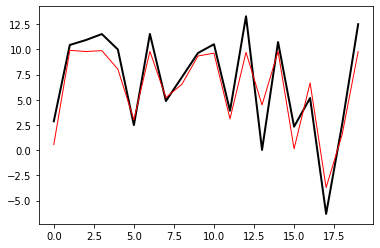

In [25]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [26]:

GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, 
                        input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

In [27]:
GRU_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 10)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 2s 15ms/step - loss: 79.5182
Epoch 2/150
6/6 [==============================] - 0s 14ms/step - loss: 77.5316
Epoch 3/150
6/6 [==============================] - 0s 14ms/step - loss: 75.6022
Epoch 4/150
6/6 [==============================] - 0s 13ms/step - loss: 73.6451
Epoch 5/150
6/6 [==============================] - 0s 12ms/step - loss: 71.7109
Epoch 6/150
6/6 [==============================] - 0s 12ms/step - loss: 69.7671
Epoch 7/150
6/6 [==============================] - 0s 12ms/step - loss: 67.8523
Epoch 8/150
6/6 [==============================] - 0s 12ms/step - loss: 65.9815
Epoch 9/150
6/6 [==============================] - 0s 12ms/step - loss: 64.0962
Epoch 10/150
6/6 [==============================] - 0s 14ms/step - loss: 62.2560
Epoch 11/150
6/6 [==============================] - 0s 15ms/step - loss: 60.3483
Epoch 12/150
6/6 [==============================] - 0s 17ms/step - loss: 58.5734
Epoch 13/150
6/6 [===================

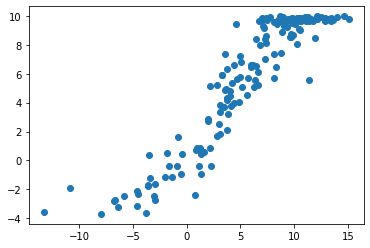

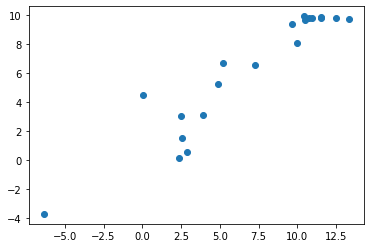

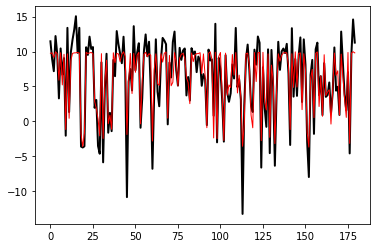

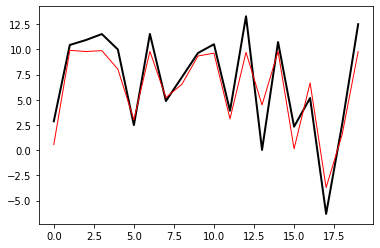

In [28]:

GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.fit(train_X, train_y, epochs=150)
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)